# Task
Analyze and graph neuronal GCamP fluorescence data from a CSV file. Calculate delta F/F for each neuron and visualize the results.

## Load the data

### Subtask:
Load the neuronal GCamP fluorescence data from the CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Prompt user for file path
file_path = input("Please enter the path to your CSV file in Google Drive (e.g., /content/drive/My Drive/folder/your_file.csv): ")

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please enter the path to your CSV file in Google Drive (e.g., /content/drive/My Drive/folder/your_file.csv): /content/drive/MyDrive/ROI data from GCamp vids/250826 wt osm6 osm8 2M NaCl single stim/osm8del/combined_output.csv


In [ ]:
# Calculate Background Subtracted F for each neuron
f_subtracted_df = pd.DataFrame(df[df.columns[0]]) # Initialize with the frame number column

# Iterate through the columns starting from the second column (index 1) in pairs (neuron and background)
# The first column is the frame number, so we start from index 1.
# We iterate with a step of 2 to get pairs of neuron and background columns.
for i in range(1, len(df.columns), 2):
    neuron_col = df.columns[i]
    background_col = df.columns[i+1]

    # Calculate background-subtracted fluorescence and add to the new DataFrame
    # The neuron number is derived from the column index (i). Since we start at index 1 for the first neuron,
    # the neuron number will be (i + 1) // 2.
    neuron_number = (i + 1) // 2
    f_subtracted_df[f'F_Subtracted_{neuron_number}'] = df[neuron_col] - df[background_col]

display(f_subtracted_df.head())

,Index,F_Subtracted_1,F_Subtracted_2,F_Subtracted_3,F_Subtracted_4,F_Subtracted_5,F_Subtracted_6,F_Subtracted_7,F_Subtracted_8,F_Subtracted_9,F_Subtracted_10,F_Subtracted_11,F_Subtracted_12,F_Subtracted_13,F_Subtracted_14,F_Subtracted_15
0,1,8490.899,7255.641,6550.200,4296.544,6673.321,6283.476,5979.622,7121.985,15135.487,3975.500,3678.016,3412.206,3691.567,11216.759,5858.014
1,2,8405.119,7228.064,6454.616,4226.607,6317.661,6111.163,5926.492,6992.515,14672.163,3859.100,3559.541,3381.588,3628.906,10996.037,5751.218
2,3,7811.186,7518.321,6276.569,4205.595,6480.908,5984.623,5899.049,6887.485,14362.149,3793.272,3503.196,3395.030,3563.041,10887.092,5682.203
3,4,7545.441,6654.256,6213.585,4163.670,6340.211,5850.148,5858.311,6846.486,13984.027,3817.672,3436.197,3364.882,3513.446,10769.537,5693.855
4,5,7870.373,6416.064,6277.600,4166.848,6108.954,5814.098,5863.820,6796.657,13579.851,3740.229,3392.180,3349.912,3487.108,10709.852,5647.116


## Convert frame number to time

### Subtask:
Assuming a frame rate, convert the frame number column to a time column.


**Reasoning**:
Convert the frame number column to a time column by dividing by the frame rate and add it to the dataframe.



In [ ]:
# Assume a frame rate (e.g., 10 frames per second)
frame_rate = 10

# Convert frame number to time in seconds and store in a new column
f_subtracted_df['Time (s)'] = f_subtracted_df[f_subtracted_df.columns[0]] / frame_rate

display(f_subtracted_df.head())

,Index,F_Subtracted_1,F_Subtracted_2,F_Subtracted_3,F_Subtracted_4,F_Subtracted_5,F_Subtracted_6,F_Subtracted_7,F_Subtracted_8,F_Subtracted_9,F_Subtracted_10,F_Subtracted_11,F_Subtracted_12,F_Subtracted_13,F_Subtracted_14,F_Subtracted_15,Time (s)
0,1,8490.899,7255.641,6550.200,4296.544,6673.321,6283.476,5979.622,7121.985,15135.487,3975.500,3678.016,3412.206,3691.567,11216.759,5858.014,0.1
1,2,8405.119,7228.064,6454.616,4226.607,6317.661,6111.163,5926.492,6992.515,14672.163,3859.100,3559.541,3381.588,3628.906,10996.037,5751.218,0.2
2,3,7811.186,7518.321,6276.569,4205.595,6480.908,5984.623,5899.049,6887.485,14362.149,3793.272,3503.196,3395.030,3563.041,10887.092,5682.203,0.3
3,4,7545.441,6654.256,6213.585,4163.670,6340.211,5850.148,5858.311,6846.486,13984.027,3817.672,3436.197,3364.882,3513.446,10769.537,5693.855,0.4
4,5,7870.373,6416.064,6277.600,4166.848,6108.954,5814.098,5863.820,6796.657,13579.851,3740.229,3392.180,3349.912,3487.108,10709.852,5647.116,0.5


## Calculate f0

### Subtask:
Identify the data points corresponding to the time range of 15 to 20 seconds and calculate the average background-subtracted F for each neuron in this range to define F0.


**Reasoning**:
Filter the DataFrame by time and calculate the mean for each 'F_Subtracted' column to get F0 values.



In [ ]:
# Filter the DataFrame for the time range 15 to 20 seconds
f0_range_df = f_subtracted_df[(f_subtracted_df['Time (s)'] >= 15) & (f_subtracted_df['Time (s)'] <= 20)]

# Select 'F_Subtracted' columns and calculate the mean
f0_values = f0_range_df.filter(like='F_Subtracted_').mean()

# Display the calculated F0 values
display(f0_values)

,0
F_Subtracted_1,7263.188471
F_Subtracted_2,8776.893392
F_Subtracted_3,7477.296255
F_Subtracted_4,4878.089118
F_Subtracted_5,5308.825294
F_Subtracted_6,5557.297627
F_Subtracted_7,5448.872412
F_Subtracted_8,7158.016275
F_Subtracted_9,12786.936196
F_Subtracted_10,3601.784667


## Calculate delta f/f0

### Subtask:
Compute Delta F/F0 for each neuron using the formula (F - F0) / F0, where F is the background-subtracted F at each time point and F0 is the baseline calculated in the previous step.


**Reasoning**:
Initialize a new DataFrame with the time column and then iterate through the background-subtracted fluorescence columns to calculate Delta F/F0 for each neuron using the previously calculated F0 values.



In [ ]:
# Initialize a new DataFrame with the 'Time (s)' column
delta_f_f0_df = pd.DataFrame(f_subtracted_df['Time (s)'])

# Iterate through the 'F_Subtracted_' columns and calculate Delta F/F0
for column in f_subtracted_df.filter(like='F_Subtracted_').columns:
    # Get the corresponding F0 value
    f0 = f0_values[column]

    # Calculate Delta F/F0
    delta_f_f0 = (f_subtracted_df[column] - f0) / f0

    # Add the calculated Delta F/F0 values to the new DataFrame
    delta_f_f0_df[column.replace('F_Subtracted_', 'DeltaF/F0_')] = delta_f_f0

# Display the head of the new DataFrame
display(delta_f_f0_df.head())

,Time (s),DeltaF/F0_1,DeltaF/F0_2,DeltaF/F0_3,DeltaF/F0_4,DeltaF/F0_5,DeltaF/F0_6,DeltaF/F0_7,DeltaF/F0_8,DeltaF/F0_9,DeltaF/F0_10,DeltaF/F0_11,DeltaF/F0_12,DeltaF/F0_13,DeltaF/F0_14,DeltaF/F0_15
0,0.1,0.169032,-0.173325,-0.123988,-0.119216,0.257024,0.130671,0.097405,-0.005034,0.183668,0.103758,0.134521,0.043643,0.388692,0.169198,-0.060054
1,0.2,0.157222,-0.176467,-0.136771,-0.133553,0.190030,0.099665,0.087655,-0.023121,0.147434,0.071441,0.097976,0.034278,0.365120,0.146191,-0.077190
2,0.3,0.075449,-0.143396,-0.160583,-0.137860,0.220780,0.076894,0.082618,-0.037794,0.123189,0.053165,0.080596,0.038389,0.340343,0.134835,-0.088264
3,0.4,0.038861,-0.241844,-0.169006,-0.146455,0.194278,0.052697,0.075142,-0.043522,0.093618,0.059939,0.059930,0.029168,0.321687,0.122581,-0.086394
4,0.5,0.083598,-0.268982,-0.160445,-0.145803,0.150717,0.046210,0.076153,-0.050483,0.062010,0.038438,0.046352,0.024590,0.311779,0.116360,-0.093894


## Photobleaching correction on delta f/f0

### Subtask:
Fit an exponential decay function to the Delta F/F0 values in the 10-20 second period and 50-60 second period of the recording for each neuron. Subtract the fitted curve from the Delta F/F0 data to get photobleaching-corrected Delta F/F0.


**Reasoning**:
Fit an exponential decay function to the Delta F/F0 values in the 10-20 second period and 50-60 second period of the recording for each neuron, subtract the fitted curve from the Delta F/F0 data to get photobleaching-corrected Delta F/F0, and add the corrected values as new columns.



In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# Define the exponential decay function for photobleaching
def exponential_decay(t, a, b, c):
    return a * np.exp(-b * t) + c

# Initialize a new DataFrame with the 'Time (s)' column
corrected_delta_f_f0_df = pd.DataFrame(delta_f_f0_df['Time (s)'])

# Iterate through the Delta F/F0 columns and calculate corrected Delta F/F0
for column in delta_f_f0_df.filter(like='DeltaF/F0_').columns:
    # Get time and delta F/F0 data for fitting
    time_data = delta_f_f0_df['Time (s)'].values
    delta_f_f0_data = delta_f_f0_df[column].values

    # Identify data points for the 10-20 second and 50-60 second periods
    fit_indices_period1 = delta_f_f0_df[(delta_f_f0_df['Time (s)'] >= 10) & (delta_f_f0_df['Time (s)'] <= 20)].index
    fit_indices_period2 = delta_f_f0_df[(delta_f_f0_df['Time (s)'] >= 50) & (delta_f_f0_df['Time (s)'] <= 60)].index


    # Combine the indices
    fit_indices = fit_indices_period1.union(fit_indices_period2)


    # Convert fit_indices to a numpy array for indexing numpy arrays
    fit_indices_np = fit_indices.to_numpy()

    # Extract data for fitting
    fit_time = time_data[fit_indices_np]
    fit_delta_f_f0 = delta_f_f0_data[fit_indices_np]

    # Remove NaN values from fit data after extracting the fitting periods
    valid_fit_indices = ~np.isnan(fit_delta_f_f0)
    fit_time = fit_time[valid_fit_indices]
    fit_delta_f_f0 = fit_delta_f_f0[valid_fit_indices]


    # Perform the exponential curve fitting
    try:
        # Initial guess for parameters (a, b, c). 'a' and 'c' can be estimated from the range of delta F/F0 in the fit data. 'b' is a decay constant, often small.
        initial_guess = (fit_delta_f_f0.max() - fit_delta_f_f0.min(), 0.01, fit_delta_f_f0.min())
        popt, pcov = curve_fit(exponential_decay, fit_time, fit_delta_f_f0, p0=initial_guess, maxfev=5000)

        # Calculate the fitted photobleaching curve for all time points
        photobleaching_curve = exponential_decay(time_data, *popt)

        # Subtract the photobleaching curve from the raw Delta F/F0
        corrected_delta_f_f0 = delta_f_f0_data - photobleaching_curve

        # Add the corrected data to the DataFrame
        corrected_delta_f_f0_df[column.replace('DeltaF/F0_', 'Corrected_DeltaF/F0_')] = corrected_delta_f_f0

    except RuntimeError:
        print(f"Could not fit exponential curve for {column}. Corrected data will be NaN.")
        corrected_delta_f_f0_df[column.replace('DeltaF/F0_', 'Corrected_DeltaF/F0_')] = np.nan

# Display the head of the DataFrame with corrected values
display(corrected_delta_f_f0_df.head())

,Time (s),Corrected_DeltaF/F0_1,Corrected_DeltaF/F0_2,Corrected_DeltaF/F0_3,Corrected_DeltaF/F0_4,Corrected_DeltaF/F0_5,Corrected_DeltaF/F0_6,Corrected_DeltaF/F0_7,Corrected_DeltaF/F0_8,Corrected_DeltaF/F0_9,Corrected_DeltaF/F0_10,Corrected_DeltaF/F0_11,Corrected_DeltaF/F0_12,Corrected_DeltaF/F0_13,Corrected_DeltaF/F0_14,Corrected_DeltaF/F0_15
0,0.1,-0.033674,-0.206552,-0.604280,-0.282149,0.189559,-0.049495,-0.115736,-0.117584,0.000099,-0.041012,-0.176449,-0.062151,0.148851,-0.066519,-0.527513
1,0.2,-0.044213,-0.209322,-0.613098,-0.295413,0.123003,-0.079614,-0.123944,-0.134646,-0.035007,-0.072330,-0.210597,-0.070651,0.126950,-0.087851,-0.541092
2,0.3,-0.124717,-0.175880,-0.632960,-0.298647,0.154191,-0.101497,-0.127442,-0.148294,-0.058123,-0.089608,-0.225588,-0.065675,0.103841,-0.097536,-0.548621
3,0.4,-0.160039,-0.273956,-0.637451,-0.306168,0.128126,-0.124807,-0.133383,-0.152996,-0.086566,-0.081835,-0.243873,-0.074031,0.086849,-0.108122,-0.543220
4,0.5,-0.114038,-0.300722,-0.624974,-0.304444,0.085003,-0.130407,-0.130841,-0.158932,-0.117046,-0.102338,-0.255077,-0.077745,0.078603,-0.112679,-0.547201


**Reasoning**:
Convert the corrected Delta F/F0 values to percentages and add them as new columns to the dataframe.



In [ ]:
# Convert corrected Delta F/F0 to percentage change and add to the DataFrame
for column in corrected_delta_f_f0_df.filter(like='Corrected_DeltaF/F0_').columns:
    corrected_delta_f_f0_percentage = corrected_delta_f_f0_df[column] * 100
    corrected_delta_f_f0_df[column.replace('Corrected_DeltaF/F0_', 'Corrected_DeltaF/F0_%_')] = corrected_delta_f_f0_percentage

# Display the head of the DataFrame with corrected percentage values
display(corrected_delta_f_f0_df.head())

,Time (s),Corrected_DeltaF/F0_1,Corrected_DeltaF/F0_2,Corrected_DeltaF/F0_3,Corrected_DeltaF/F0_4,Corrected_DeltaF/F0_5,Corrected_DeltaF/F0_6,Corrected_DeltaF/F0_7,Corrected_DeltaF/F0_8,Corrected_DeltaF/F0_9,...,Corrected_DeltaF/F0_%_6,Corrected_DeltaF/F0_%_7,Corrected_DeltaF/F0_%_8,Corrected_DeltaF/F0_%_9,Corrected_DeltaF/F0_%_10,Corrected_DeltaF/F0_%_11,Corrected_DeltaF/F0_%_12,Corrected_DeltaF/F0_%_13,Corrected_DeltaF/F0_%_14,Corrected_DeltaF/F0_%_15
0,0.1,-0.033674,-0.206552,-0.604280,-0.282149,0.189559,-0.049495,-0.115736,-0.117584,0.000099,...,-4.949514,-11.573609,-11.758398,0.009892,-4.101184,-17.644912,-6.215062,14.885085,-6.651914,-52.751255
1,0.2,-0.044213,-0.209322,-0.613098,-0.295413,0.123003,-0.079614,-0.123944,-0.134646,-0.035007,...,-7.961422,-12.394407,-13.464597,-3.500684,-7.233049,-21.059683,-7.065076,12.695026,-8.785117,-54.109157
2,0.3,-0.124717,-0.175880,-0.632960,-0.298647,0.154191,-0.101497,-0.127442,-0.148294,-0.058123,...,-10.149676,-12.744174,-14.829361,-5.812302,-8.960832,-22.558776,-6.567489,10.384119,-9.753576,-54.862122
3,0.4,-0.160039,-0.273956,-0.637451,-0.306168,0.128126,-0.124807,-0.133383,-0.152996,-0.086566,...,-12.480717,-13.338321,-15.299589,-8.656557,-8.183523,-24.387283,-7.403127,8.684938,-10.812164,-54.322020
4,0.5,-0.114038,-0.300722,-0.624974,-0.304444,0.085003,-0.130407,-0.130841,-0.158932,-0.117046,...,-13.040664,-13.084109,-15.893175,-11.704567,-10.233785,-25.507665,-7.774537,7.860321,-11.267916,-54.720096


**Reasoning**:
Export the DataFrame containing the corrected Delta F/F0 percentages to a CSV file.



In [ ]:
# Select only the corrected percentage columns and the time column for export
corrected_percentage_columns = corrected_delta_f_f0_df.filter(like='Corrected_DeltaF/F0_%_')
corrected_percentage_columns = pd.concat([corrected_delta_f_f0_df['Time (s)'], corrected_percentage_columns], axis=1)


# Save the DataFrame to a CSV file
csv_filename = 'corrected_delta_f_f0_percentages_per_neuron.csv'
corrected_percentage_columns.to_csv(csv_filename, index=False)

print(f"Corrected Delta F/F0 percentages per neuron saved to {csv_filename}")

Corrected Delta F/F0 percentages per neuron saved to corrected_delta_f_f0_percentages_per_neuron.csv


**Reasoning**:
Select the corrected percentage columns and the time column from the DataFrame and save it to a CSV file.



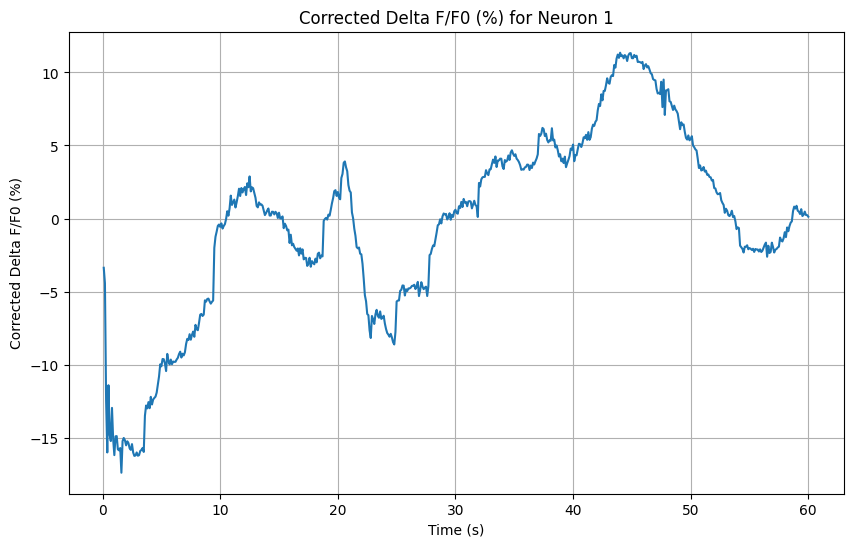

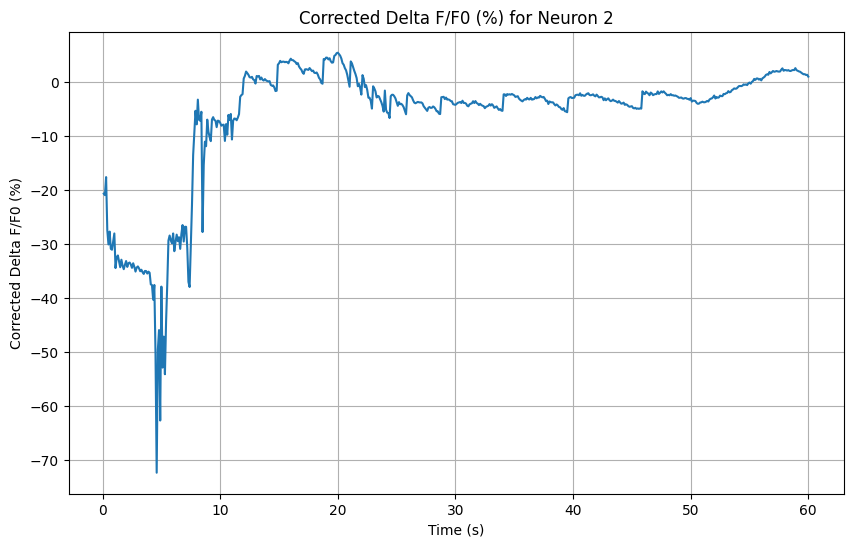

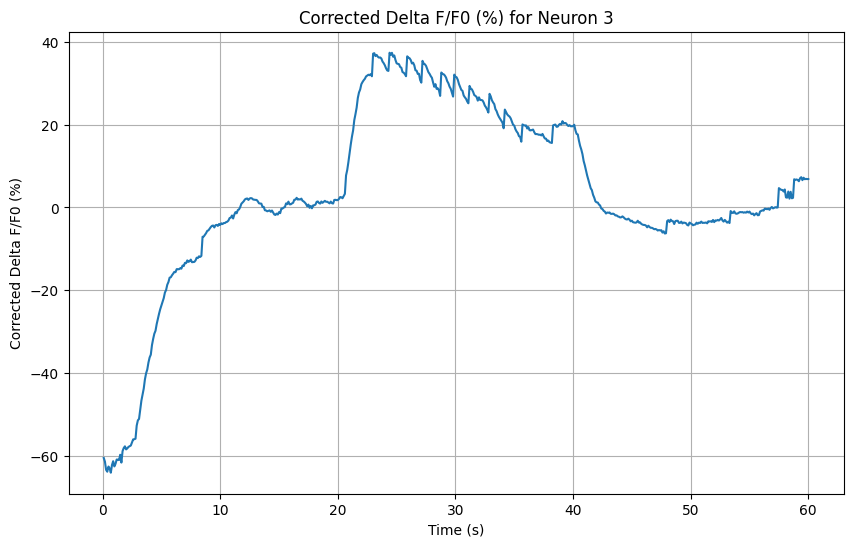

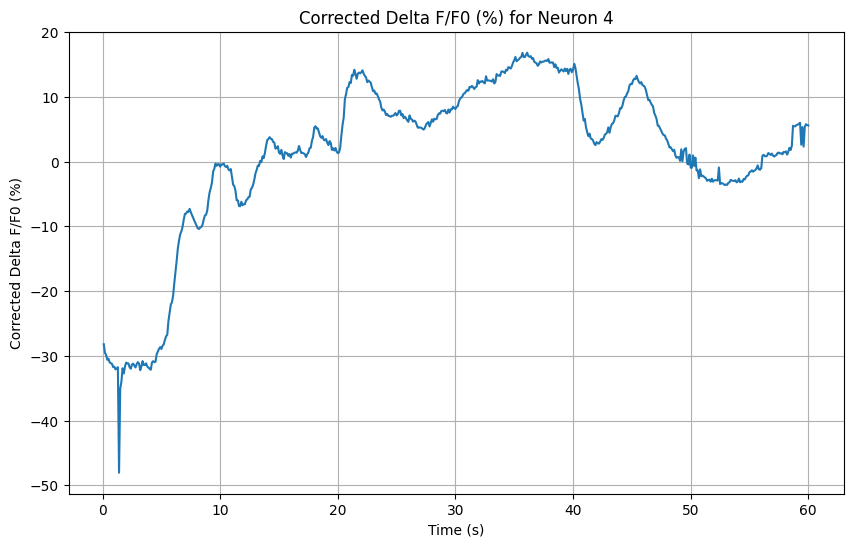

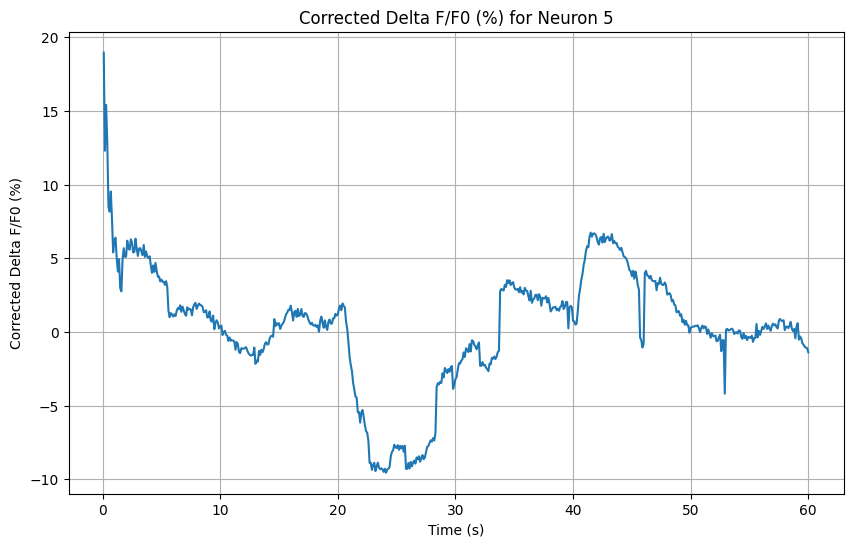

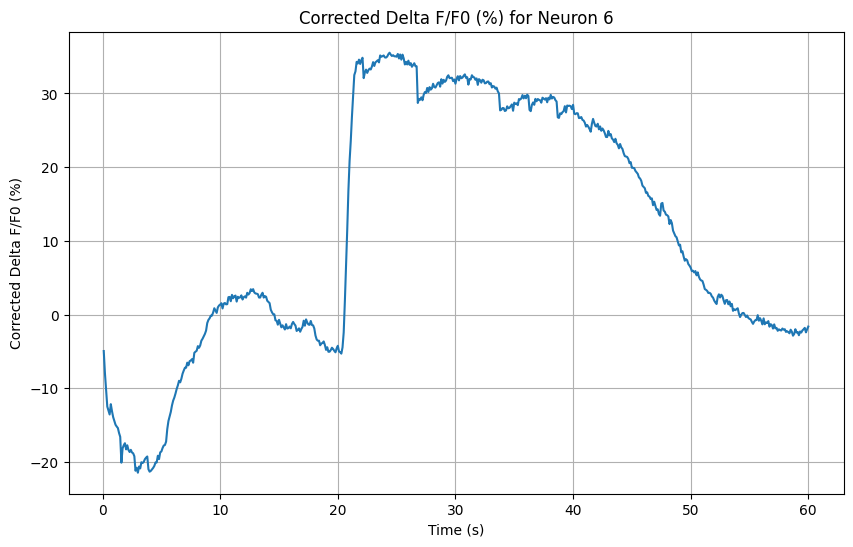

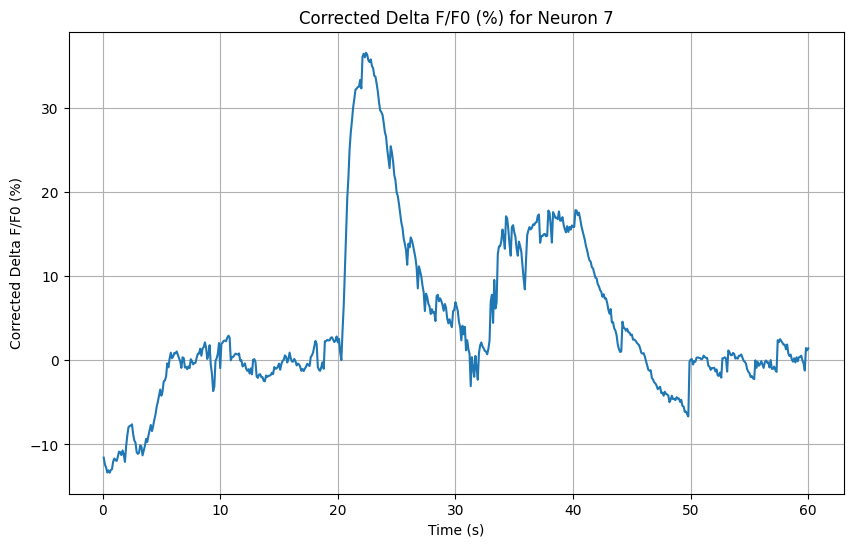

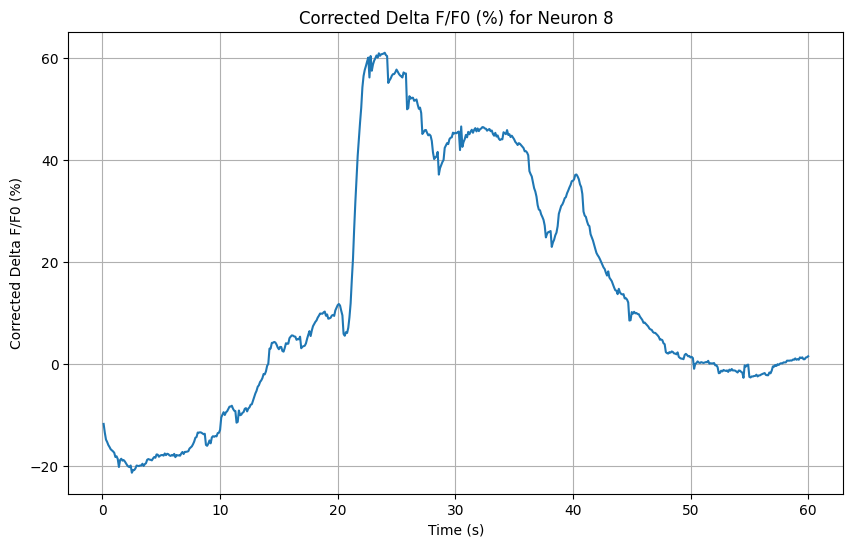

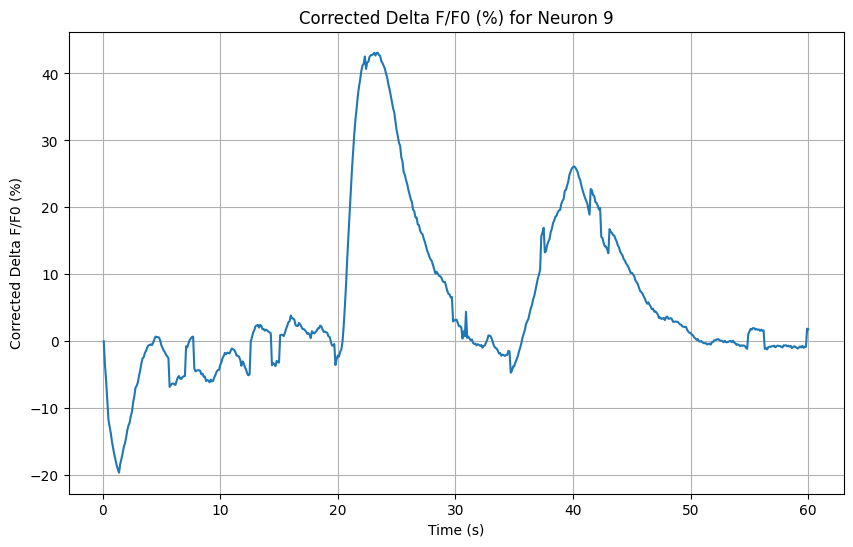

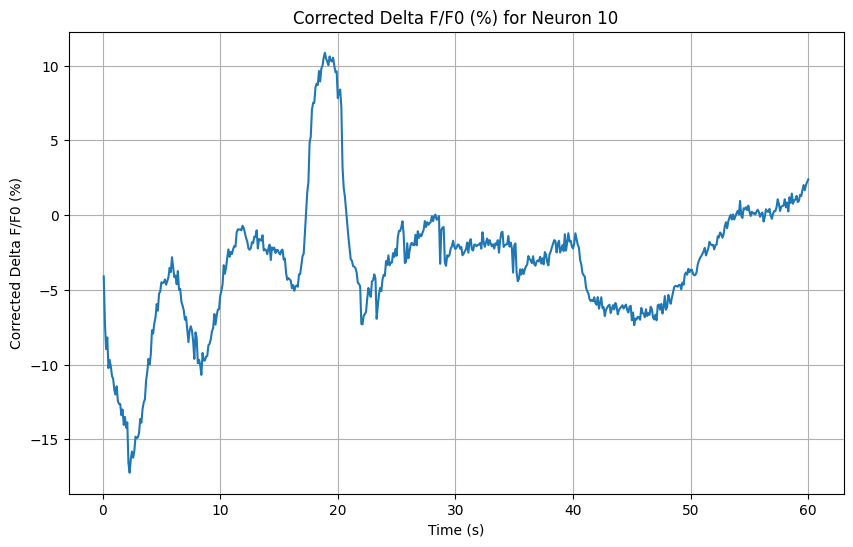

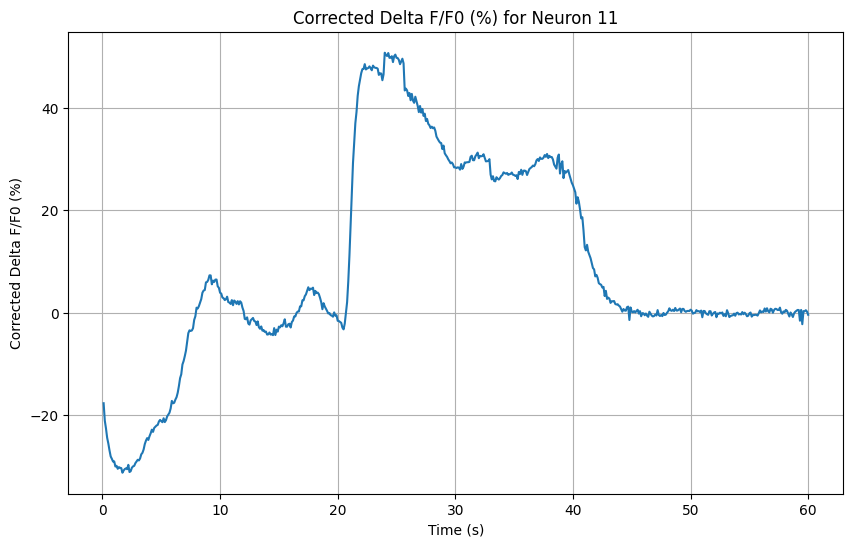

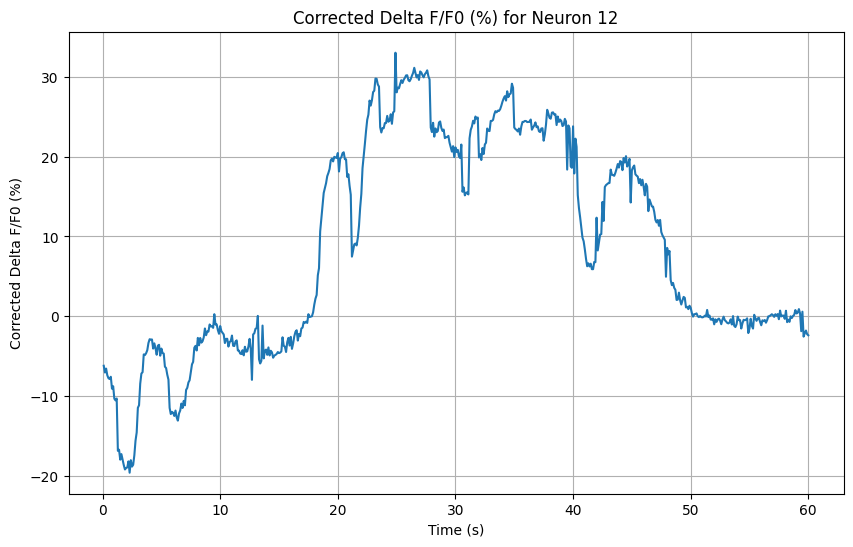

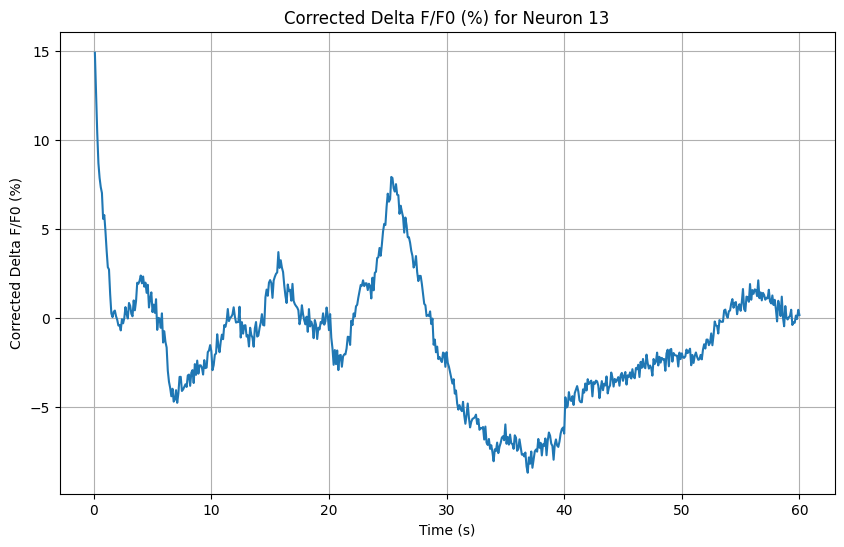

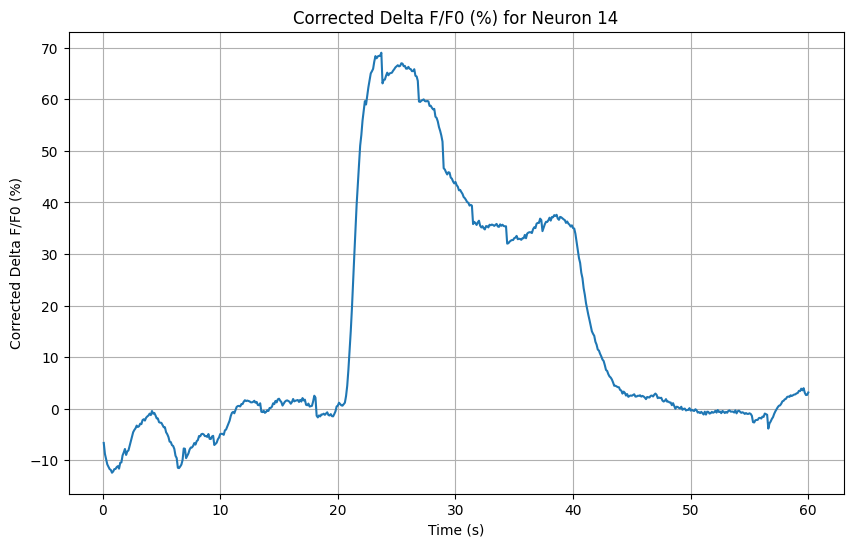

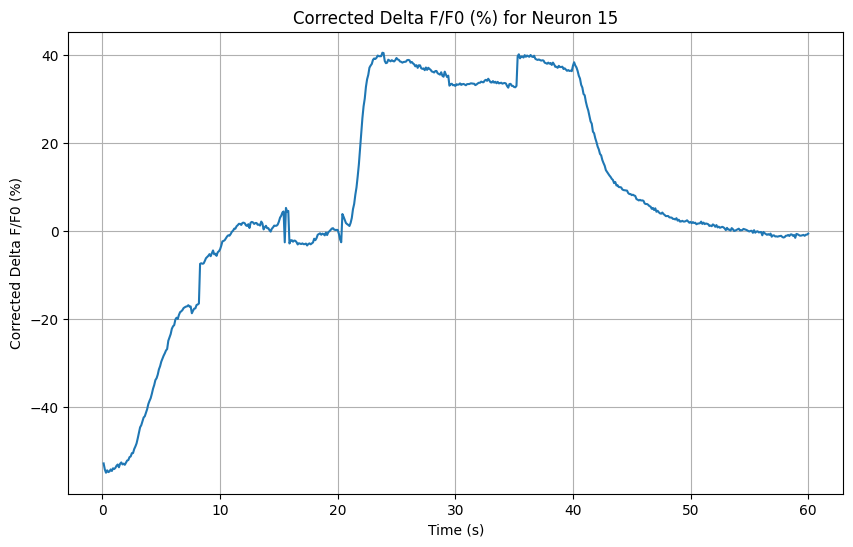

In [ ]:
import matplotlib.pyplot as plt

# Iterate through the columns of the corrected_delta_f_f0_df DataFrame, looking for 'Corrected_DeltaF/F0_%_' columns
for column in corrected_delta_f_f0_df.columns:
    if 'Corrected_DeltaF/F0_%_' in column:
        # Extract the neuron number from the column name
        neuron_number = column.split('_')[-1]
        plt.figure(figsize=(10, 6))
        plt.plot(corrected_delta_f_f0_df['Time (s)'], corrected_delta_f_f0_df[column])
        plt.xlabel('Time (s)')
        plt.ylabel('Corrected Delta F/F0 (%)')
        plt.title(f'Corrected Delta F/F0 (%) for Neuron {neuron_number}')
        plt.grid(True)
        plt.show()

Time-adjusted Corrected Delta F/F0 percentages per neuron saved to corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv
Mean and SEM of time-adjusted Corrected Delta F/F0 percentages saved to mean_sem_corrected_delta_f_f0_all_neurons_time_adjusted.csv


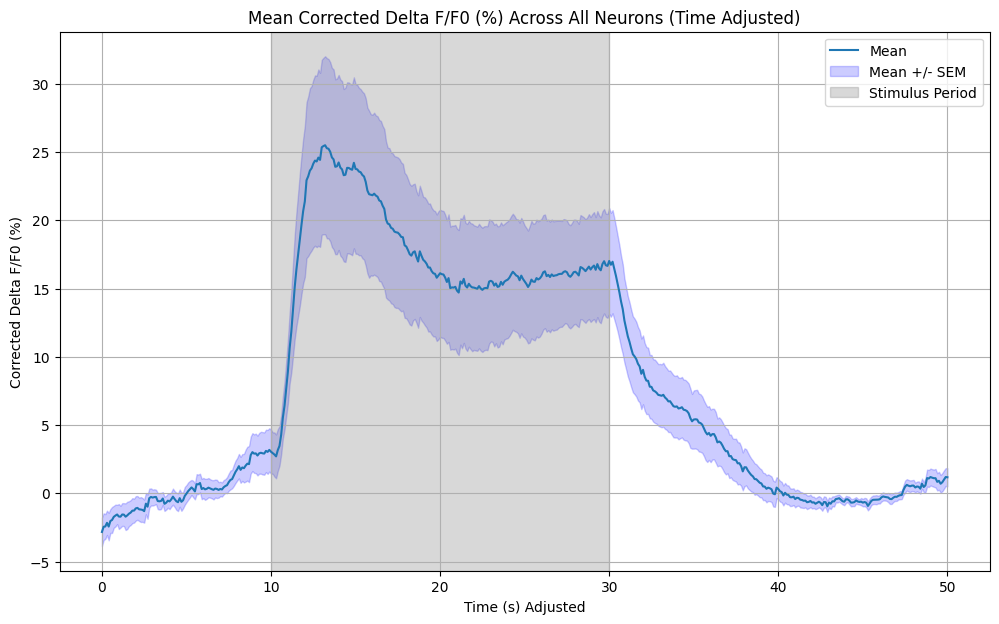

In [ ]:
# Remove the first 10 seconds of data (frames 0-99, corresponding to time 0.0-9.9s)
corrected_delta_f_f0_df_filtered = corrected_delta_f_f0_df[corrected_delta_f_f0_df['Time (s)'] >= 10].copy()

# Renumber the x-axis to start from 0 seconds
corrected_delta_f_f0_df_filtered['Time (s) Adjusted'] = corrected_delta_f_f0_df_filtered['Time (s)'] - 10

# Select only the corrected percentage columns and the adjusted time column for export
corrected_percentage_columns_filtered = corrected_delta_f_f0_df_filtered.filter(like='Corrected_DeltaF/F0_%_')
corrected_percentage_columns_filtered = pd.concat([corrected_delta_f_f0_df_filtered['Time (s) Adjusted'], corrected_percentage_columns_filtered], axis=1)

# Save the DataFrame to a CSV file
csv_filename_filtered = 'corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv'
corrected_percentage_columns_filtered.to_csv(csv_filename_filtered, index=False)

print(f"Time-adjusted Corrected Delta F/F0 percentages per neuron saved to {csv_filename_filtered}")


# Calculate the mean and SEM of the corrected Delta F/F0 percentage across all neurons in the filtered data
mean_corrected_delta_f_f0_percentage_filtered = corrected_percentage_columns_filtered.filter(like='Corrected_DeltaF/F0_%_').mean(axis=1)
sem_corrected_delta_f_f0_percentage_filtered = corrected_percentage_columns_filtered.filter(like='Corrected_DeltaF/F0_%_').sem(axis=1)

# Create a new DataFrame for the mean and SEM values with the adjusted time
mean_sem_corrected_df_filtered = pd.DataFrame({
    'Time (s) Adjusted': corrected_percentage_columns_filtered['Time (s) Adjusted'],
    'Mean_Corrected_DeltaF/F0 (%)': mean_corrected_delta_f_f0_percentage_filtered,
    'SEM_Corrected_DeltaF/F0 (%)': sem_corrected_delta_f_f0_percentage_filtered
})

# Save the mean and SEM DataFrame to a CSV
mean_sem_csv_filename_filtered = 'mean_sem_corrected_delta_f_f0_all_neurons_time_adjusted.csv'
mean_sem_corrected_df_filtered.to_csv(mean_sem_csv_filename_filtered, index=False)
print(f"Mean and SEM of time-adjusted Corrected Delta F/F0 percentages saved to {mean_sem_csv_filename_filtered}")


# Plot the mean corrected Delta F/F0 percentage with SEM using an error envelope
plt.figure(figsize=(12, 7))
plt.plot(mean_sem_corrected_df_filtered['Time (s) Adjusted'],
         mean_sem_corrected_df_filtered['Mean_Corrected_DeltaF/F0 (%)'],
         label='Mean')

plt.fill_between(mean_sem_corrected_df_filtered['Time (s) Adjusted'],
                 mean_sem_corrected_df_filtered['Mean_Corrected_DeltaF/F0 (%)'] - mean_sem_corrected_df_filtered['SEM_Corrected_DeltaF/F0 (%)'],
                 mean_sem_corrected_df_filtered['Mean_Corrected_DeltaF/F0 (%)'] + mean_sem_corrected_df_filtered['SEM_Corrected_DeltaF/F0 (%)'],
                 color='blue', alpha=0.2, label='Mean +/- SEM')


# Indicate the stimulus period (10-30 seconds in original time, which is 0-20 in adjusted time)
stimulus_start_time_adjusted = 10 # This corresponds to 20s in the original data
stimulus_end_time_adjusted = 30 # This corresponds to 40s in the original data
plt.axvspan(stimulus_start_time_adjusted, stimulus_end_time_adjusted, color='gray', alpha=0.3, label='Stimulus Period')


plt.xlabel('Time (s) Adjusted')
plt.ylabel('Corrected Delta F/F0 (%)')
plt.title('Mean Corrected Delta F/F0 (%) Across All Neurons (Time Adjusted)')
plt.grid(True)
plt.legend()

# Save the plot as a TIFF file
tiff_filename = 'mean_corrected_delta_f_f0_all_neurons_time_adjusted.tiff'
plt.savefig(tiff_filename, format='tiff', dpi=300)

plt.show()

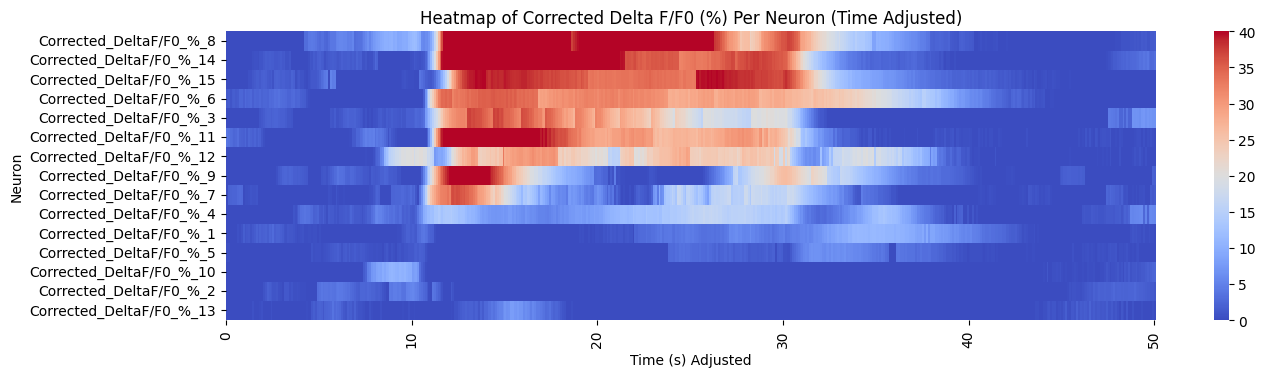

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for heatmap: remove the time column and transpose the DataFrame
heatmap_data_filtered = corrected_percentage_columns_filtered.drop('Time (s) Adjusted', axis=1)
# Transpose the DataFrame to have neurons as rows and time as columns for the heatmap
heatmap_data_filtered = heatmap_data_filtered.T

# Identify the stimulus window indices (10 to 30 seconds in adjusted time)
stimulus_start_index = corrected_percentage_columns_filtered[corrected_percentage_columns_filtered['Time (s) Adjusted'] >= 10].index[0]
stimulus_end_index = corrected_percentage_columns_filtered[corrected_percentage_columns_filtered['Time (s) Adjusted'] <= 30].index[-1]

# Calculate the peak response for each neuron during the stimulus window
# Need to select the columns from the original heatmap_data_filtered before transposing for this calculation
peak_responses = corrected_percentage_columns_filtered.filter(like='Corrected_DeltaF/F0_%_').iloc[stimulus_start_index:stimulus_end_index+1].max()

# Order the neurons based on peak response
ordered_neurons = peak_responses.sort_values(ascending=False).index

# Reindex the transposed heatmap data according to the ordered neurons
heatmap_data_ordered = heatmap_data_filtered.reindex(ordered_neurons)

# Define the total duration of the filtered data in seconds
duration_filtered = corrected_percentage_columns_filtered['Time (s) Adjusted'].max() - corrected_percentage_columns_filtered['Time (s) Adjusted'].min()
total_frames_filtered = len(corrected_percentage_columns_filtered)
frame_rate = total_frames_filtered / duration_filtered if duration_filtered > 0 else 1 # Avoid division by zero

# Set the x-axis ticks and labels to represent time in seconds
# We want ticks at 0, 10, 20, 30, 40, 50 seconds
desired_ticks_seconds = np.arange(0, 51, 10)
# Convert desired seconds to corresponding frame indices
tick_indices = [corrected_percentage_columns_filtered[corrected_percentage_columns_filtered['Time (s) Adjusted'] >= sec].index[0] - corrected_percentage_columns_filtered.index[0] for sec in desired_ticks_seconds]


# Shrink the height of the heatmap
heatmap_height = heatmap_data_ordered.shape[0] * 0.25 # Reduce height by 50% again
plt.figure(figsize=(15, heatmap_height)) # Adjust figure size as needed

# Create the heatmap with specified color map and value range
sns.heatmap(heatmap_data_ordered, cmap='coolwarm', vmin=0, vmax=40) # Changed colormap to 'coolwarm' for red to blue

plt.xlabel('Time (s) Adjusted') # Heatmap x-axis corresponds to data index
plt.ylabel('Neuron')
plt.title('Heatmap of Corrected Delta F/F0 (%) Per Neuron (Time Adjusted)')

# Set the x-axis ticks and labels
plt.xticks(tick_indices, desired_ticks_seconds)

# Save the heatmap as a TIFF file
heatmap_tiff_filename = 'heatmap_corrected_delta_f_f0_per_neuron_time_adjusted.tiff'
plt.savefig(heatmap_tiff_filename, format='tiff', dpi=300)

plt.show()

In [ ]:
# Create a zip archive of all generated files
!zip -r /content/gcamp_analysis_results.zip /content/*.csv /content/*.tiff

# Provide a link to download the zip file
from google.colab import files
files.download('/content/gcamp_analysis_results.zip')

  adding: content/corrected_delta_f_f0_percentages_per_neuron.csv (deflated 52%)
  adding: content/corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv (deflated 52%)
  adding: content/mean_sem_corrected_delta_f_f0_all_neurons_time_adjusted.csv (deflated 53%)
  adding: content/heatmap_corrected_delta_f_f0_per_neuron_time_adjusted.tiff (deflated 99%)
  adding: content/mean_corrected_delta_f_f0_all_neurons_time_adjusted.tiff (deflated 99%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Remove all generated CSV, TIFF, and zip files from the /content/ directory
!rm /content/*.csv
!rm /content/*.tiff
!rm /content/*.zip

print("All generated CSV, TIFF, and zip files have been removed.")

All generated CSV, TIFF, and zip files have been removed.
